In [2]:
import numpy as np
import pandas as pd

In [152]:
df_train_data.columns

Index([u'Account Number', u'Gender', u'Age', u'Salary Slab', u'Age of Home',
       u'Churners', u'Sum', u'payment_complaint', u'account_complaint',
       u'utility_complaint', u'operation_complaint', u'Default times',
       u'Loyal years', u'Scheme_CHC', u'Scheme_CNN', u'Scheme_ESS',
       u'Scheme_KLA', u'Scheme_MXX', u'Scheme_PMM', u'Scheme_POP',
       u'Scheme_PPL', u'Scheme_PRM', u'Scheme_PRP', u'Scheme_PRR',
       u'Scheme_PWM', u'Scheme_PWP', u'Scheme_PWR', u'Region _Eastern',
       u'Region _Northern', u'Region _Southern', u'Region _Western',
       u'Accounting', u'Academics', u'Automative', u'Banking', u'Defence',
       u'Finance', u'Pharma', u'Labour', u'Others'],
      dtype='object')

In [3]:
df_train_data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_train_data.csv")
df_train_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others,Scheme_PRM
0,M1189,1,43,3,7,0,876.645,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,M3864,1,63,4,12,0,748.440,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7957,1,29,9,17,0,1883.945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M2413,0,50,4,7,0,874.860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M3528,1,51,3,12,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test_data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_test_data.csv")
df_test_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others,Scheme_PRM
0,M9773,1,51,4,17,0,748.230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3396,1,51,4,17,0,769.125,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7889,1,62,6,17,0,839.895,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,M3423,0,50,4,21,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4624,1,51,4,17,0,637.035,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_acc_nums, test_acc_nums = df_train_data["Account Number"].values, df_test_data["Account Number"].values
ytrain, ytest = df_train_data["Churners"].values, df_test_data["Churners"].values
yidx = np.where(np.array(df_train_data.columns) == "Churners")[0][0]
Xtrain = pd.concat([df_train_data.iloc[:,1:yidx], df_train_data.iloc[:,yidx+1:]],axis = 1).values
Xtest = pd.concat([df_test_data.iloc[:,1:yidx], df_test_data.iloc[:,yidx+1:]], axis = 1).values

In [204]:
Xtrain

array([[  1.,  43.,   3., ...,   0.,   0.,   0.],
       [  1.,  63.,   4., ...,   0.,   0.,   0.],
       [  1.,  29.,   9., ...,   0.,   0.,   0.],
       ..., 
       [  0.,  62.,   1., ...,   0.,   0.,   0.],
       [  0.,  64.,   6., ...,   0.,   0.,   0.],
       [  0.,  63.,   3., ...,   0.,   0.,   0.]])

In [159]:
df_train_data.iloc[:,1:7].corr()

,Gender,Age,Salary Slab,Age of Home,Churners,Sum
Gender,1.000000,0.023842,-0.006895,0.051388,-0.005693,-0.008937
Age,0.023842,1.000000,0.083658,0.296768,-0.042624,-0.032991
Salary Slab,-0.006895,0.083658,1.000000,0.278051,-0.037803,0.022125
Age of Home,0.051388,0.296768,0.278051,1.000000,-0.052292,-0.050769
Churners,-0.005693,-0.042624,-0.037803,-0.052292,1.000000,-0.019940
Sum,-0.008937,-0.032991,0.022125,-0.050769,-0.019940,1.000000


In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [161]:
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain_std, Xtest_std = sc.transform(Xtrain), sc.transform(Xtest)
Xtrain_std

array([[ 0.81931607, -0.58032731, -0.78282149, ..., -0.03361885,
        -0.08925026, -0.40282571],
       [ 0.81931607,  1.00507734, -0.21968732, ..., -0.03361885,
        -0.08925026, -0.40282571],
       [ 0.81931607, -1.69011056,  2.59598355, ..., -0.03361885,
        -0.08925026, -0.40282571],
       ..., 
       [-1.22053019,  0.9258071 , -1.90908983, ..., -0.03361885,
        -0.08925026, -0.40282571],
       [-1.22053019,  1.08434757,  0.90658103, ..., -0.03361885,
        -0.08925026, -0.40282571],
       [-1.22053019,  1.00507734, -0.78282149, ..., -0.03361885,
        -0.08925026, -0.40282571]])

### K-Nearest Neighbor Algorithm

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(Xtrain_std,ytrain)
ypred = knn.predict(Xtest_std)
np.sum(ypred)

97.0

In [163]:
accuracy_score(np.zeros(len(ytest)), ytest)

0.95235707121364088

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[1811,   88],
       [  86,    9]])

In [165]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred)

0.093749999999999986

In [166]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_neighbors" : range(1,30),
    "weights" : ["uniform", "distance"],
    "p" : [1,2]
}
grid = RandomizedSearchCV(knn,param_grid,cv=10, scoring="roc_auc")
grid.fit(Xtrain_std,ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [167]:
grid.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.57274, std: 0.03274, params: {'p': 2, 'weights': 'uniform', 'n_neighbors': 10},
 mean: 0.60818, std: 0.03022, params: {'p': 1, 'weights': 'uniform', 'n_neighbors': 26},
 mean: 0.58911, std: 0.03994, params: {'p': 1, 'weights': 'uniform', 'n_neighbors': 17},
 mean: 0.57109, std: 0.03688, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 11},
 mean: 0.57695, std: 0.03835, params: {'p': 1, 'weights': 'distance', 'n_neighbors': 15},
 mean: 0.59397, std: 0.03921, params: {'p': 2, 'weights': 'uniform', 'n_neighbors': 19},
 mean: 0.59971, std: 0.04353, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 28},
 mean: 0.57436, std: 0.02898, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 13},
 mean: 0.54875, std: 0.03003, params: {'p': 2, 'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.60759, std: 0.03969, params: {'p': 2, 'weights': 'uniform', 'n_neighbors': 25}]

In [168]:
grid.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}

In [169]:
grid.best_score_

0.60817855527655484

In [170]:
from sklearn.preprocessing import binarize
from sklearn import metrics

In [171]:
knn = KNeighborsClassifier(n_neighbors=26, p = 1, weights= "uniform")
knn.fit(Xtrain_std, ytrain)
ypred_prob = knn.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.62533466367340151

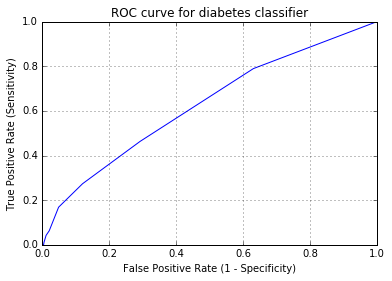

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig(r"C:\Users\SHIVAM MAHAJAN\Desktop\knn_roc")

In [173]:
def evaluate_score(threshold, ypred_prob):
    ypred_class = binarize([ypred_prob],threshold)
    ypred = ypred_class[0]
    confusion = confusion_matrix(ytest,ypred)
    tpr = confusion[1,1]/float(confusion[1,1] + confusion[1,0])
    fpr = confusion[0,1]/float(confusion[0,1] + confusion[0,0])
    print "Senstivty :", tpr
    print "Specificity :", 1-fpr
    print "F1-Score :", metrics.f1_score(ytest,ypred)
    print "Confusion Matrix :"
    print confusion

In [174]:
evaluate_score(0.038,ypred_prob)

Senstivty : 0.789473684211
Specificity : 0.369141653502
F1-Score : 0.109649122807
Confusion Matrix :
[[ 701 1198]
 [  20   75]]


In [175]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.044962
std         0.050354
min         0.000000
25%         0.000000
50%         0.038462
75%         0.076923
max         0.384615
dtype: float64

### Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [183]:
param_grid = {
    "C" : [0.0001,0.003,0.01,0.03,0.1,0.3,1,3,10],
    "penalty" : ["l1", "l2"]
}
rand_cv = RandomizedSearchCV(lr, param_grid, cv = 10, scoring = "roc_auc", n_iter=15)
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=LogisticRegression(C=0.003, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [184]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.0001},
 mean: 0.68154, std: 0.04569, params: {'penalty': 'l2', 'C': 0.0001},
 mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.003},
 mean: 0.68333, std: 0.04477, params: {'penalty': 'l2', 'C': 0.003},
 mean: 0.67360, std: 0.04425, params: {'penalty': 'l2', 'C': 3},
 mean: 0.68012, std: 0.04475, params: {'penalty': 'l2', 'C': 0.01},
 mean: 0.67423, std: 0.03944, params: {'penalty': 'l1', 'C': 0.03},
 mean: 0.67710, std: 0.04454, params: {'penalty': 'l2', 'C': 0.03},
 mean: 0.67764, std: 0.04266, params: {'penalty': 'l1', 'C': 0.1},
 mean: 0.67358, std: 0.04425, params: {'penalty': 'l2', 'C': 10},
 mean: 0.67598, std: 0.04412, params: {'penalty': 'l1', 'C': 0.3},
 mean: 0.67393, std: 0.04437, params: {'penalty': 'l2', 'C': 0.3},
 mean: 0.67468, std: 0.04415, params: {'penalty': 'l1', 'C': 1},
 mean: 0.67369, std: 0.04423, params: {'penalty': 'l2', 'C': 1},
 mean: 0.67396, std: 0.04416, params: {'penalty': 'l1', 

In [185]:
rand_cv.best_params_

{'C': 0.003, 'penalty': 'l2'}

In [186]:
rand_cv.best_score_

0.68333403786008551

In [187]:
lr = LogisticRegression(penalty="l2", C= 0.003)
lr.fit(Xtrain_std, ytrain)
ypred_prob_lr = lr.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob_lr)

0.70430143288711511

In [188]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.044962
std         0.050354
min         0.000000
25%         0.000000
50%         0.038462
75%         0.076923
max         0.384615
dtype: float64

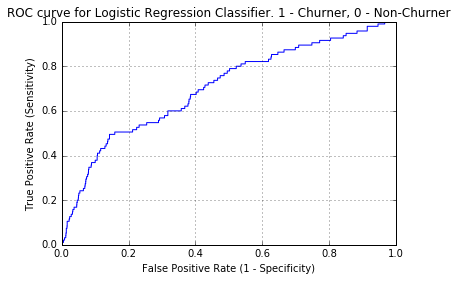

In [352]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob_lr)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression Classifier. 1 - Churner, 0 - Non-Churner')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig(r"C:\Users\SHIVAM MAHAJAN\Desktop\lr_roc")

In [326]:
evaluate_score(0.162,ypred_prob_lr) 

Senstivty : 0.368421052632
Specificity : 0.903106898368
F1-Score : 0.222929936306
Confusion Matrix :
[[1715  184]
 [  60   35]]


#### Clearly Logistic is Better than KNN. But we are yet to chose a cutoff.

### SVM

In [31]:
import time

In [47]:
from sklearn.svm import SVC
svm = SVC()
para_grid = {
    "C" : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
    "degree" : [2,3,4,5],
    "kernel" : ["poly"]
}

In [48]:
rand_cv = RandomizedSearchCV(svm, para_grid, scoring = "roc_auc", cv = 10, n_iter=20)
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'kernel': ['poly'], 'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3], 'degree': [2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [49]:
rand_cv.grid_scores_

[mean: 0.53613, std: 0.05633, params: {'kernel': 'poly', 'C': 3, 'degree': 5},
 mean: 0.53344, std: 0.04872, params: {'kernel': 'poly', 'C': 0.1, 'degree': 4},
 mean: 0.53865, std: 0.05428, params: {'kernel': 'poly', 'C': 0.01, 'degree': 3},
 mean: 0.54222, std: 0.03984, params: {'kernel': 'poly', 'C': 0.003, 'degree': 5},
 mean: 0.53413, std: 0.05010, params: {'kernel': 'poly', 'C': 0.003, 'degree': 2},
 mean: 0.54467, std: 0.04933, params: {'kernel': 'poly', 'C': 1, 'degree': 4},
 mean: 0.54058, std: 0.05580, params: {'kernel': 'poly', 'C': 1, 'degree': 5},
 mean: 0.53718, std: 0.05372, params: {'kernel': 'poly', 'C': 0.1, 'degree': 3},
 mean: 0.53946, std: 0.04021, params: {'kernel': 'poly', 'C': 0.01, 'degree': 5},
 mean: 0.52419, std: 0.03925, params: {'kernel': 'poly', 'C': 0.01, 'degree': 2},
 mean: 0.54011, std: 0.05561, params: {'kernel': 'poly', 'C': 1, 'degree': 3},
 mean: 0.54111, std: 0.04492, params: {'kernel': 'poly', 'C': 0.003, 'degree': 4},
 mean: 0.54223, std: 0.0416

In [50]:
rand_cv.best_score_

0.55555734689171621

In [51]:
rand_cv.best_params_

{'C': 3, 'degree': 2, 'kernel': 'poly'}

In [53]:
svm = SVC(C=3, degree = 2, kernel = "poly", probability=True)
svm.fit(Xtrain_std, ytrain)
ypred_prob_svm = svm.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob_svm)

0.4985726559685153

#### Using rbf

In [202]:
from sklearn.svm import SVC
svm = SVC()
para_grid = {
    "C" : [0.01, 0.03, 0.1, 0.3, 1],
    "gamma" : [0.01, 0.03, 0.1, 0.3, 1],
    "kernel" : ["rbf"]
}

In [203]:
rand_cv = RandomizedSearchCV(svm, para_grid, cv = 10, scoring = "roc_auc")
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'kernel': ['rbf'], 'C': [0.01, 0.03, 0.1, 0.3, 1], 'gamma': [0.01, 0.03, 0.1, 0.3, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [205]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.55969, std: 0.04719, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1},
 mean: 0.55838, std: 0.04587, params: {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.03},
 mean: 0.55613, std: 0.04451, params: {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.03},
 mean: 0.56176, std: 0.04967, params: {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.3},
 mean: 0.55331, std: 0.03827, params: {'kernel': 'rbf', 'C': 1, 'gamma': 1},
 mean: 0.57041, std: 0.05384, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.3},
 mean: 0.55345, std: 0.03848, params: {'kernel': 'rbf', 'C': 0.3, 'gamma': 1},
 mean: 0.56992, std: 0.05335, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.3},
 mean: 0.55630, std: 0.04401, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.03},
 mean: 0.55400, std: 0.03977, params: {'kernel': 'rbf', 'C': 0.03, 'gamma': 1}]

In [206]:
rand_cv.best_params_

{'C': 0.1, 'gamma': 0.3, 'kernel': 'rbf'}

In [207]:
svm = SVC(C=0.1, gamma = 0.3, kernel = "rbf", probability=True)
svm.fit(Xtrain_std, ytrain)
ypred_prob_rbf = svm.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob_rbf)

0.7105041434550039

In [58]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.054617
std         0.008934
min         0.019071
25%         0.049455
50%         0.055158
75%         0.060143
max         0.111483
dtype: float64

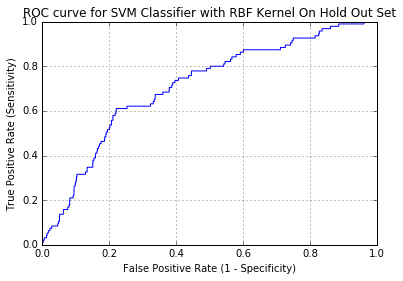

In [356]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob_rbf)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM Classifier with RBF Kernel On Hold Out Set')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig(r"C:\Users\SHIVAM MAHAJAN\Desktop\svm_roc")

In [85]:
evaluate_score(0.056,ypred_prob_rbf)

Senstivty : 0.505263157895
Specificity : 0.744602422328
F1-Score : 0.152866242038
Confusion Matrix :
[[1414  485]
 [  47   48]]


In [86]:
ypred_rbf = binarize([ypred_prob_rbf], 0.056)[0]
accuracy_score(ypred_rbf, ytest)

0.73319959879638918

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, Xtrain_std, ytrain, cv = 10, scoring = "roc_auc")
scores

array([ 0.62260175,  0.58880178,  0.60290037,  0.60801394,  0.56429862,
        0.56002387,  0.56716996,  0.58539812,  0.59447993,  0.59789973])

In [89]:
scores.mean()

0.58915880695732159

In [91]:
rf.fit(Xtrain_std, ytrain)
ypred_prob = rf.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.63712480252764614

In [92]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.055401
std         0.098150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         0.700000
dtype: float64

### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, Xtrain_std, ytrain, cv = 10, scoring= "roc_auc")
scores

array([ 0.48826823,  0.49661247,  0.50427475,  0.5171635 ,  0.51505033,
        0.55299071,  0.51709898,  0.51429217,  0.50682346,  0.53187508])

### Neural Network Classifier

In [208]:
from sklearn.neural_network import MLPClassifier

In [275]:
nn = MLPClassifier(hidden_layer_sizes= 100,activation = "relu", alpha = 5, solver = "sgd", learning_rate_init="0.1")
para_grid = {
    "hidden_layer_sizes": [(80,70),(80,80),(80,100),(80,60),(80,90)],
    "alpha" : [3,5,7,8,9]
}

In [277]:
para_grid = {
    "hidden_layer_sizes": [(80,90)],
    "learning_rate_init": [0.03,0.01,0.1,0.003],
    "alpha" : [5]
}
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(nn, para_grid,cv = 10, scoring = "roc_auc")
grid_cv.fit(Xtrain_std, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init='0.1', max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [5], 'learning_rate_init': [0.03, 0.01, 0.1, 0.003], 'hidden_layer_sizes': [(80, 90)]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [278]:
grid_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68567, std: 0.04757, params: {'alpha': 5, 'learning_rate_init': 0.03, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68673, std: 0.04670, params: {'alpha': 5, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (80, 90)},
 mean: 0.52281, std: 0.18361, params: {'alpha': 5, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68698, std: 0.04693, params: {'alpha': 5, 'learning_rate_init': 0.003, 'hidden_layer_sizes': (80, 90)}]

In [280]:
grid_cv.best_params_

{'alpha': 5, 'hidden_layer_sizes': (80, 90), 'learning_rate_init': 0.003}

In [210]:
rand_cv = RandomizedSearchCV(nn, para_grid, cv = 10, scoring="roc_auc")
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': [3, 5, 7, 8, 9], 'hidden_layer_sizes': [(80, 70), (80, 80), (80, 100), (80, 60), (80, 90)]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [211]:
import winsound
Freq = 2500 # Set Frequency To 2500 Hertz
Dur = 1000 # Set Duration To 1000 ms == 1 second
winsound.Beep(Freq,Dur)

In [212]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68461, std: 0.04654, params: {'alpha': 8, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68408, std: 0.04732, params: {'alpha': 8, 'hidden_layer_sizes': (80, 70)},
 mean: 0.68657, std: 0.04539, params: {'alpha': 9, 'hidden_layer_sizes': (80, 80)},
 mean: 0.68525, std: 0.04830, params: {'alpha': 7, 'hidden_layer_sizes': (80, 70)},
 mean: 0.68650, std: 0.04604, params: {'alpha': 3, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68525, std: 0.04732, params: {'alpha': 9, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68514, std: 0.04886, params: {'alpha': 9, 'hidden_layer_sizes': (80, 100)},
 mean: 0.68583, std: 0.04666, params: {'alpha': 8, 'hidden_layer_sizes': (80, 60)},
 mean: 0.68691, std: 0.04671, params: {'alpha': 7, 'hidden_layer_sizes': (80, 60)},
 mean: 0.68710, std: 0.04719, params: {'alpha': 5, 'hidden_layer_sizes': (80, 90)}]

In [213]:
rand_cv.best_score_

0.68709862893864659

In [214]:
rand_cv.best_params_

{'alpha': 5, 'hidden_layer_sizes': (80, 90)}

In [111]:
from sklearn.cross_validation import cross_val_score

In [289]:
nn = MLPClassifier(hidden_layer_sizes= (80,90),activation = "relu", alpha = 5, learning_rate_init= 0.003, solver="sgd")
nn.fit(Xtrain_std, ytrain)
ypred_prob_nn = nn.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob_nn)

0.704301432887115

In [290]:
pd.Series(ypred_prob_nn).describe()

count    1994.000000
mean        0.054843
std         0.014177
min         0.028389
25%         0.046385
50%         0.051508
75%         0.058769
max         0.107708
dtype: float64

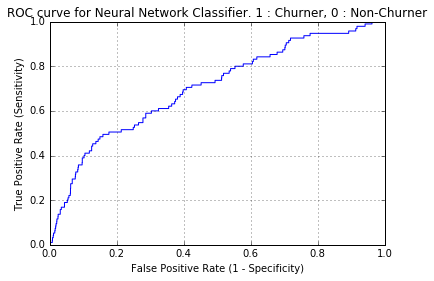

In [348]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob_nn)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Neural Network Classifier. 1 : Churner, 0 : Non-Churner')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig(r"C:\Users\SHIVAM MAHAJAN\Desktop\nn_roc")

In [415]:
evaluate_score(0.07,ypred_prob_nn)

Senstivty : 0.389473684211
Specificity : 0.899947340706
F1-Score : 0.229813664596
Confusion Matrix :
[[1709  190]
 [  58   37]]


### Final Predictions

In [244]:
df_validation_data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_validation_data.csv")
df_validation_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Sum,payment_complaint,account_complaint,utility_complaint,operation_complaint,...,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others,Scheme_PRM
0,V1,1,51,4,17,1186.465,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,V2,0,71,12,22,824.670,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,V3,1,69,9,22,839.895,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,V4,1,71,5,22,1212.015,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,V5,1,61,6,22,854.070,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [245]:
df_validation_data.columns

Index([u'Account Number', u'Gender', u'Age', u'Salary Slab', u'Age of Home',
       u'Sum', u'payment_complaint', u'account_complaint',
       u'utility_complaint', u'operation_complaint', u'Default times',
       u'Loyal years', u'Scheme_CHC', u'Scheme_CNN', u'Scheme_ESS',
       u'Scheme_KLA', u'Scheme_MXX', u'Scheme_PMM', u'Scheme_POP',
       u'Scheme_PPL', u'Scheme_PRP', u'Scheme_PRR', u'Scheme_PRS',
       u'Scheme_PWM', u'Scheme_PWR', u'Region _Eastern', u'Region _Northern',
       u'Region _Southern', u'Region _Western', u'Accounting', u'Academics',
       u'Automative', u'Banking', u'Defence', u'Finance', u'Pharma', u'Labour',
       u'Others', u'Scheme_PRM'],
      dtype='object')

In [246]:
validation_accounts = df_validation_data["Account Number"].values

In [247]:
validation_accounts

array(['V1', 'V2', 'V3', ..., 'V4998', 'V4999', 'V5000'], dtype=object)

In [249]:
Xval = df_validation_data.iloc[:,1:].values

In [261]:
X = np.vstack((Xtrain,Xtest))
y = np.hstack((ytrain, ytest))
print X.shape
y.shape

(9966L, 38L)


(9966L,)

In [260]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_std.shape

(9966L, 38L)

### Applying Logistic Regression

In [281]:
lr = LogisticRegression(C = 0.003, penalty = "l2")
lr.fit(X,y)

LogisticRegression(C=0.003, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [327]:
yval_prob_lr = lr.predict_proba(Xval)[:,1]
yval_lr = binarize([yval_prob_lr], 0.22)[0]
print yval_lr

[ 0.  0.  0. ...,  0.  0.  0.]


In [328]:
np.sum(yval_lr)

15.0

In [329]:
len(yval_lr)

4986

### Applying Neural Networks

In [272]:
nn

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [330]:
nn = MLPClassifier(activation="relu", alpha = 5, hidden_layer_sizes=(80,90), learning_rate_init=0.003)
nn.fit(X, y)
yval_prob_nn = nn.predict_proba(Xval)[:,1]
yval_nn = binarize([yval_prob_nn], 0.07)[0]

In [333]:
np.sum(yval_nn)

61.0

In [337]:
final_output_nn = np.zeros((len(yval),3), dtype=object)

In [338]:
final_output_nn[:,0] = validation_accounts
final_output_nn[:,1] = yval_prob_nn
final_output_nn[:,2] = yval_nn

In [339]:
final_output_nn

array([['V1', 4.778705818866111e-06, 0.0],
       ['V2', 6.359607243637522e-05, 0.0],
       ['V3', 6.789380463314964e-05, 0.0],
       ..., 
       ['V4998', 0.0002002836528252478, 0.0],
       ['V4999', 0.0002233425131539527, 0.0],
       ['V5000', 0.00018846145085072146, 0.0]], dtype=object)

In [344]:
df_final_output = pd.DataFrame(final_output_nn,columns=["ACCT_NUM","PREDICTED_RESP_PROBABILITY","PREDICTED_CLASS"])
df_final_output

,ACCT_NUM,PREDICTED_RESP_PROBABILITY,PREDICTED_CLASS
0,V1,4.77871e-06,0
1,V2,6.35961e-05,0
2,V3,6.78938e-05,0
3,V4,2.25487e-06,0
4,V5,0.000101503,0
5,V6,0.000162648,0
6,V7,2.10104e-07,0
7,V8,8.90948e-05,0
8,V9,5.0067e-05,0
9,V10,6.50992e-06,0


In [345]:
df_final_output.to_excel(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\solution3.xlsx", index= False)

In [346]:
svm

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [357]:
df_train_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others,Scheme_PRM
0,M1189,1,43,3,7,0,876.645,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,M3864,1,63,4,12,0,748.440,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7957,1,29,9,17,0,1883.945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M2413,0,50,4,7,0,874.860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M3528,1,51,3,12,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = pd.concat([df_train_data, df_test_data])
df.shape

(9966, 40)

In [8]:
import matplotlib.pyplot as plt
Churner_ages = df[df["Churners"] == 1]["Age"].values
Non_Churner_ages = df[df["Churners"] == 0]["Age"].values
values2 = plt.hist(Churner_ages,bins = 10,color="green", range = (0,100))
churners_intervals = values2[0]
plt.title("Histogram of all churners age")
plt.xlabel("Age of Customers")
plt.ylabel("Number of people with this age")

In [9]:
plt.show()

In [10]:
churners_intervals

array([   0.,    5.,   39.,   73.,   91.,  226.,   51.,   17.,    3.,    1.])

In [11]:
values = plt.hist(Non_Churner_ages,range = (0,100),color="green",bins = 10)

In [12]:
non_churners_intervals = values[0]
non_churners_intervals

array([    0.,    58.,   586.,  1130.,  1762.,  3890.,  1438.,   458.,
         122.,    16.])

In [13]:
values[1]

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

In [20]:
total = plt.hist(df["Age"].values, bins=10, range = (0,100))
total

(array([    0.,    63.,   625.,  1203.,  1853.,  4116.,  1489.,   475.,
          125.,    17.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

In [21]:
df.columns

Index([u'Account Number', u'Gender', u'Age', u'Salary Slab', u'Age of Home',
       u'Churners', u'Sum', u'payment_complaint', u'account_complaint',
       u'utility_complaint', u'operation_complaint', u'Default times',
       u'Loyal years', u'Scheme_CHC', u'Scheme_CNN', u'Scheme_ESS',
       u'Scheme_KLA', u'Scheme_MXX', u'Scheme_PMM', u'Scheme_POP',
       u'Scheme_PPL', u'Scheme_PRP', u'Scheme_PRR', u'Scheme_PWM',
       u'Scheme_PWP', u'Scheme_PWR', u'Region _Eastern', u'Region _Northern',
       u'Region _Southern', u'Region _Western', u'Accounting', u'Academics',
       u'Automative', u'Banking', u'Defence', u'Finance', u'Pharma', u'Labour',
       u'Others', u'Scheme_PRM'],
      dtype='object')

In [16]:
churners_intervals

array([   0.,    5.,   39.,   73.,   91.,  226.,   51.,   17.,    3.,    1.])

In [17]:
non_churners_intervals

array([    0.,    58.,   586.,  1130.,  1762.,  3890.,  1438.,   458.,
         122.,    16.])

In [18]:
total[1]

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

In [19]:
total[0]

array([    0.,    49.,   501.,   972.,  1456.,  3305.,  1190.,   383.,
         102.,    14.])

In [22]:
perc_of_churners_profession = churners_intervals/total[0]
perc_of_churners_profession[np.isfinite(perc_of_churners_profession) == False] = 0
perc_of_churners_profession = perc_of_churners_profession*100
normalized_perc_of_churners_profession = [p/np.sum(perc_of_churners_profession) for p in perc_of_churners_profession]
np.array(normalized_perc_of_churners_profession)

array([ 0.        ,  0.17278515,  0.1358506 ,  0.13210955,  0.10691606,
        0.11953912,  0.07456799,  0.07791701,  0.05225023,  0.12806429])

In [23]:
from pylab import *

In [26]:
interval = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
barh(np.arange(0,100,10), perc_of_churners_profession,height = 4, color = 'purple')
plt.yticks(np.arange(0,100,10),interval)
plt.xticks(np.arange(0,10,1))
plt.ylabel("Age Goups",fontsize='large')
plt.xlabel("Percentage of Churners in a particular age group in %",fontsize="large")
plt.title("Bar Chart Representing ")

In [27]:
plt.show()

In [31]:
interval = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
plt.figure(figsize=(50,50))
barh(np.arange(0,100,10), total[0],height = 4, color = 'purple',label="Total")
barh(np.arange(0,100,10)-1.5, churners_intervals,height = 4, color = 'pink', align = 'center',label="Churners")
plt.yticks(np.arange(0,100,10),interval)
plt.ylabel("Age Goups",fontsize='large')
plt.xlabel("Number of people in a particular age group",fontsize="large")
plt.title("Bar Chart Representing ")
plt.xticks(np.arange(0,np.max(total[0]),300))
plt.legend()
plt.show()

In [524]:
plt.show()

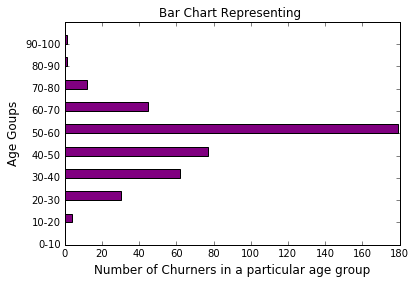

In [497]:
interval = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
barh(np.arange(0,100,10), churners_intervals,height = 4, color = 'purple')
plt.yticks(np.arange(0,100,10),interval)
plt.ylabel("Age Goups",fontsize='large')
plt.xlabel("Number of Churners in a particular age group",fontsize="large")
plt.title("Bar Chart Representing ")
#plt.xticks(np.arange(0,3800,300))

In [33]:
df["Gender"].value_counts()

1    6003
0    3963
Name: Gender, dtype: int64

In [35]:
df[df["Churners"] == 1]["Gender"].value_counts()

1    303
0    203
Name: Gender, dtype: int64

In [60]:
plt.figure(figsize=(10,10))
plt.bar(np.array([0,0.3]),np.array([303,203]),color='green',width = 0.03, align = "center")
#plt.bar(np.array([0,1])-0.4,[6003,3963],width = 0.1)
plt.xticks([0,0.3],["Male", "Female"])
plt.xlabel("Gender")
plt.ylabel("Count of Churners")
plt.show()

In [62]:
303/6003.0

0.050474762618690654

In [64]:
203/3963.0

0.05122382033812768

### Professional Info

In [65]:
df.columns

Index([u'Account Number', u'Gender', u'Age', u'Salary Slab', u'Age of Home',
       u'Churners', u'Sum', u'payment_complaint', u'account_complaint',
       u'utility_complaint', u'operation_complaint', u'Default times',
       u'Loyal years', u'Scheme_CHC', u'Scheme_CNN', u'Scheme_ESS',
       u'Scheme_KLA', u'Scheme_MXX', u'Scheme_PMM', u'Scheme_POP',
       u'Scheme_PPL', u'Scheme_PRP', u'Scheme_PRR', u'Scheme_PWM',
       u'Scheme_PWP', u'Scheme_PWR', u'Region _Eastern', u'Region _Northern',
       u'Region _Southern', u'Region _Western', u'Accounting', u'Academics',
       u'Automative', u'Banking', u'Defence', u'Finance', u'Pharma', u'Labour',
       u'Others', u'Scheme_PRM'],
      dtype='object')

In [82]:
professions_total = df.iloc[:,-10:-1].sum().values
professions_total = professions_total.astype(int)
professions_total

array([  20,  364,    1,  877,    8, 1454,  152,   10,   77])

In [88]:
df_churners = df[df["Churners"] == 1]
professions_churners = df_churners.iloc[:,-10:-1].sum().values
professions_churners

array([  0.,  13.,   0.,  37.,   1.,  43.,   3.,   0.,   7.])

In [103]:
profession_churner_perc = [pcp/np.sum(professions_churners) for pcp in professions_churners]
profession_churner_perc
professions = ["", "Academics", "Automative", "Banking", "Defence", "Finance", "Pharma", "", "Others"]
profession_colors = ["red","yellow","blue","green","pink","purple","violet","black","red"]

In [110]:
plt.pie(profession_churner_perc,labels = professions,shadow=True, labeldistance=1.1,colors=profession_colors)
plt.title("Churners in different Professions")
plt.show()